In [107]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [108]:
#Import CSV files
q1_monthly_user_scores = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q1_monthly_user_scores.csv")
q1_user_groups = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q1_user_groups.csv")
q2_visits_length_of_stay = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q2_visits_length_of_stay.csv")
q3_user_scores = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q3_user_scores.csv")
q4_client_monthly_los = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q4_client_monthly_los.csv")
q4_covid_census = pd.read_csv("/Users/lindseyvalput/Desktop/Customer-Success-Team-Project/Data/q4_covid_census.csv")


In [109]:
q2_visits_length_of_stay.head()

,encounter_id,length_of_stay,date,user_id
0,166360,0.897061,2022-01-01,2
1,165739,9.259950,2022-01-01,2
2,166112,1.155417,2022-01-01,5
3,165902,1.614640,2022-01-01,1
4,166349,2.101197,2022-01-01,3


In [110]:
q2_visits_length_of_stay["date"].value_counts()

2022-01-01    1094
2022-02-01    1003
Name: date, dtype: int64

In [111]:
q2_visits_length_of_stay[["year", "month", "date"]] = q2_visits_length_of_stay["date"].str.split("-", expand = True)
q2_months_los = q2_visits_length_of_stay.groupby(["month", "user_id"])["length_of_stay"].mean()
q2_months_los = pd.DataFrame(q2_months_los)


In [112]:
q2_months_los = q2_months_los.reset_index()
q2_months_los

,month,user_id,length_of_stay
0,01,1,3.727297
1,01,2,3.971378
2,01,3,3.988581
3,01,4,4.146854
4,01,5,3.932500
5,01,6,3.785016
6,01,7,4.106078
7,01,8,3.604529
8,01,9,4.099504
9,01,10,3.718854


In [117]:
q2_months_los_jan = q2_months_los.loc[q2_months_los["month"] == "01", :]
q2_months_los_feb = q2_months_los.loc[q2_months_los["month"] == "02", :]

In [125]:
q2_months_los_feb

,month,user_id,length_of_stay
10,02,1,5.263547
11,02,2,3.832899
12,02,3,3.813862
13,02,4,4.054415
14,02,5,3.784443
15,02,6,3.662581
16,02,7,3.967795
17,02,8,3.740141
18,02,9,4.228852
19,02,10,4.454070


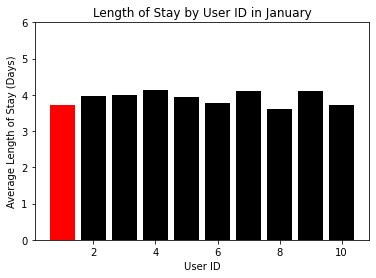

In [167]:
plt.bar(q2_months_los_jan["user_id"], q2_months_los_jan["length_of_stay"], 
        color=['red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black'])
plt.title("Length of Stay by User ID in January")
plt.xlabel("User ID")
plt.ylabel("Average Length of Stay (Days)")
plt.ylim(0,6)
plt.savefig("../Customer-Success-Team-Project/Images/LOSjan.png")
plt.show()


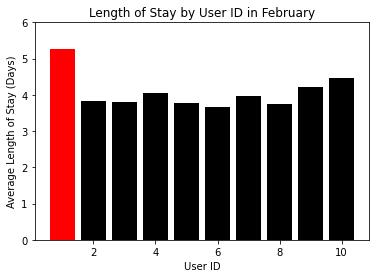

In [169]:
plt.bar(q2_months_los_feb["user_id"], q2_months_los_feb["length_of_stay"],
        color=['red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black'])
plt.title("Length of Stay by User ID in February")
plt.xlabel("User ID")
plt.ylabel("Average Length of Stay (Days)")
plt.ylim(0,6)
plt.savefig("../Customer-Success-Team-Project/Images/LOSfeb.png")
plt.show()


In [170]:
q1_user_groups_value_counts = q1_user_groups["group_id"].value_counts()
q1_user_groups_value_counts

1    24
3    23
4    20
2    18
Name: group_id, dtype: int64

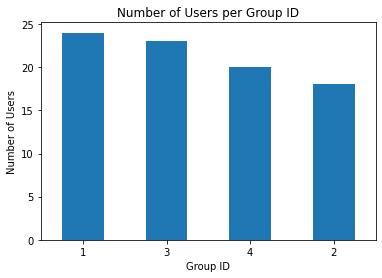

In [166]:
q1_user_groups_value_counts.plot.bar()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of Users per Group ID")
plt.xlabel("Group ID")
plt.ylabel("Number of Users")
plt.savefig("../Customer-Success-Team-Project/Images/NumberofUsersperGroupID.png")
plt.show()

### Observations:

● User_ID 1 had a higher average length of stay in February as compared to other user_ids. This is an increase from length of stay in January, which is similiar to other user_ids. 

● User_ID 1 is assigned to Group 1, which has the most users (24) across the four groups. 

● Given Group 1 (which contains User_ID 1) has the most users, it is likely this is the root cause for a higher average length of stay when compared to other groups with less user_ids. 

● To implement a fairer way to measure user average length of stay, it is important to look at how users are grouped together and sample sizes are relatively close to ensure a larger group size is not inherently driving the average length of stay to increase.

In [49]:
q4_client_monthly_los.head()

,date,length_of_stay
0,2020-03-31,5.086791
1,2020-04-30,5.156738
2,2020-05-31,4.993787
3,2020-06-30,5.364481
4,2020-07-31,5.523364


In [45]:
q1_monthly_user_scores.head()

,date,score,sample_size,user_id
0,2022-01-01,4.16,48,42
1,2022-01-01,6.60,45,56
2,2022-01-01,3.80,36,77
3,2022-01-01,4.64,48,43
4,2022-01-01,4.39,39,54


In [48]:
q3_user_scores.head()

,user_id,score,sample_size,date
0,3.0,1.95,90.0,2020-01-01
1,17.0,1.76,88.0,2020-01-01
2,3.0,1.83,119.0,2020-02-01
3,17.0,1.81,105.0,2020-02-01
4,3.0,2.11,113.0,2020-03-01


In [50]:
q4_covid_census.head()

,date,cases
0,2020-03-06,1
1,2020-03-07,2
2,2020-03-08,2
3,2020-03-09,2
4,2020-03-10,2
